<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/40_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition**

In this lesson, we will implement **simple Face Recognitions using the python library face-recognition**.

1. Install `face-recognition`
2. Check facial similarity
3. Recognize Faces in an image


In [1]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=d801d459f6424338ec29926b682cf0af75b64b06c884a59eb3feddad145ee98b
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


## **2. Check Facial Similarity between two Faces**

In [2]:
# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [7]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/trump.jpg
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/biden.jpg
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/biden2.jpg

--2025-01-23 02:36:17--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/trump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144929 (142K) [image/jpeg]
Saving to: ‘trump.jpg.2’

trump.jpg.2         100%[===================>] 141.53K  --.-KB/s    in 0.02s   

2025-01-23 02:36:17 (6.15 MB/s) - ‘trump.jpg.2’ saved [144929/144929]

--2025-01-23 02:36:17--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/biden.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71290 (70K) [image/jpeg]
Saving to:

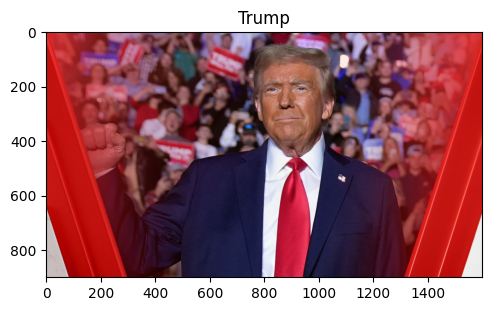

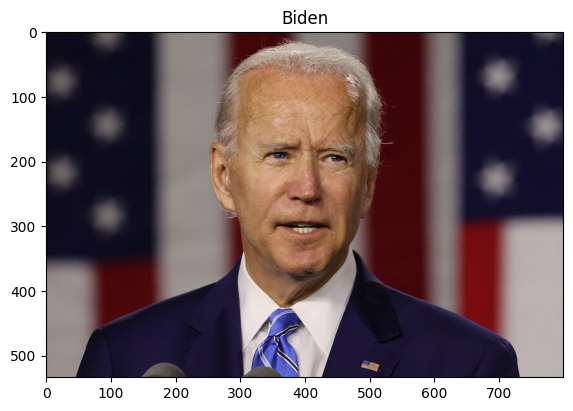

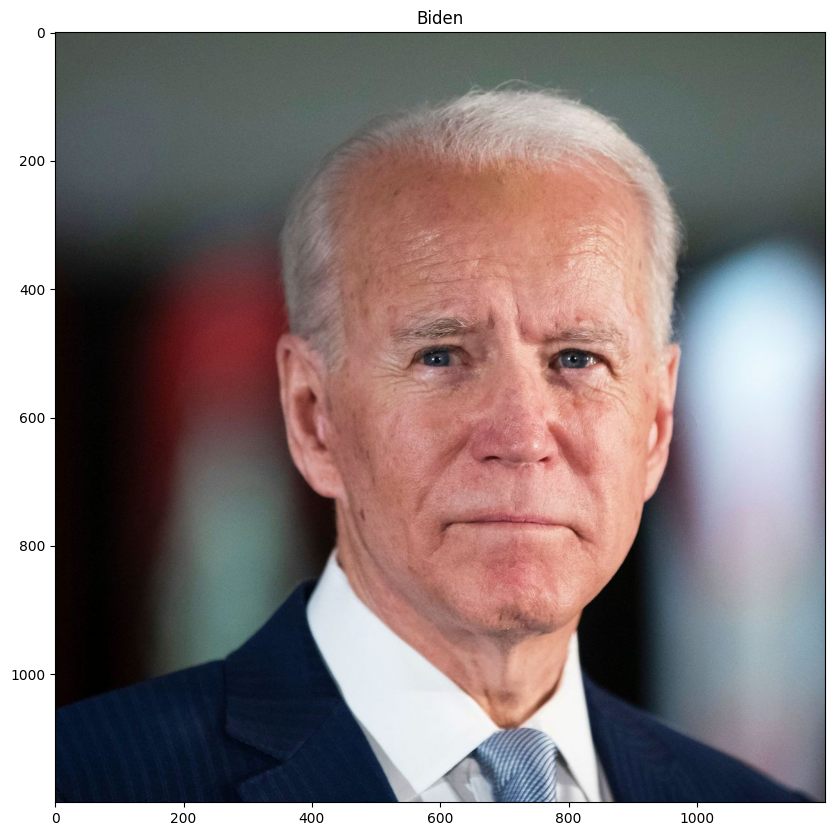

In [8]:
import cv2
from matplotlib import pyplot as plt

biden = cv2.imread('biden.jpg')
biden2 = cv2.imread('biden2.jpg')
trump = cv2.imread('trump.jpg')

imshow('Trump', trump)
imshow('Biden', biden)
imshow('Biden', biden2)

### **Now let's try it with the above two images**

In [9]:
import face_recognition

known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("trump.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is False


### **Now let's try it with the two Biden images**

In [10]:
import face_recognition

known_image = face_recognition.load_image_file("biden.jpg")
unknown_image = face_recognition.load_image_file("biden2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is True


## **3. Recognize Faces in an image**

In [11]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt

try:
    # Birinchi rasmni yuklash va kodlash
    trump_image = face_recognition.load_image_file("trump.jpg")
    trump_face_locations = face_recognition.face_locations(trump_image)
    if len(trump_face_locations) > 0:
        trump_face_encoding = face_recognition.face_encodings(trump_image, trump_face_locations)[0]
    else:
        print("Trump rasmida yuz topilmadi")
        exit()

    # Ikkinchi rasmni yuklash va kodlash
    biden_image = face_recognition.load_image_file("biden.jpg")
    biden_face_locations = face_recognition.face_locations(biden_image)
    if len(biden_face_locations) > 0:
        biden_face_encoding = face_recognition.face_encodings(biden_image, biden_face_locations)[0]
    else:
        print("Biden rasmida yuz topilmadi")
        exit()

    # Ma'lum yuz kodlari va nomlarini saqlash
    known_face_encodings = [
        trump_face_encoding,
        biden_face_encoding
    ]
    known_face_names = [
        "Donald Trump",
        "Joe Biden"
    ]

    # Test rasmini yuklash
    frame = cv2.imread('biden2.jpg')
    if frame is None:
        print("Test rasmini yuklab bo'lmadi")
        exit()

    # Rasmni kichiklashtirish
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Yuzlarni aniqlash
    face_locations = face_recognition.face_locations(rgb_small_frame)
    if len(face_locations) == 0:
        print("Test rasmida yuz topilmadi")
        exit()

    # Yuzlarni kodlash
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        if True in matches:
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

        face_names.append(name)

    # Natijalarni chizish
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.6, (255, 255, 255), 1)

    # Natijani ko'rsatish
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Xato yuz berdi: {e}")

Xato yuz berdi: compute_face_descriptor(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], face: _dlib_pybind11.full_object_detection, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vector
    2. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], num_jitters: int = 0) -> _dlib_pybind11.vector
    3. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], faces: _dlib_pybind11.full_object_detections, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectors
    4. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], batch_faces: List[_dlib_pybind11.full_object_detections], num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectorss
    5. (self: _dlib_pybind11.face_recognition_mo

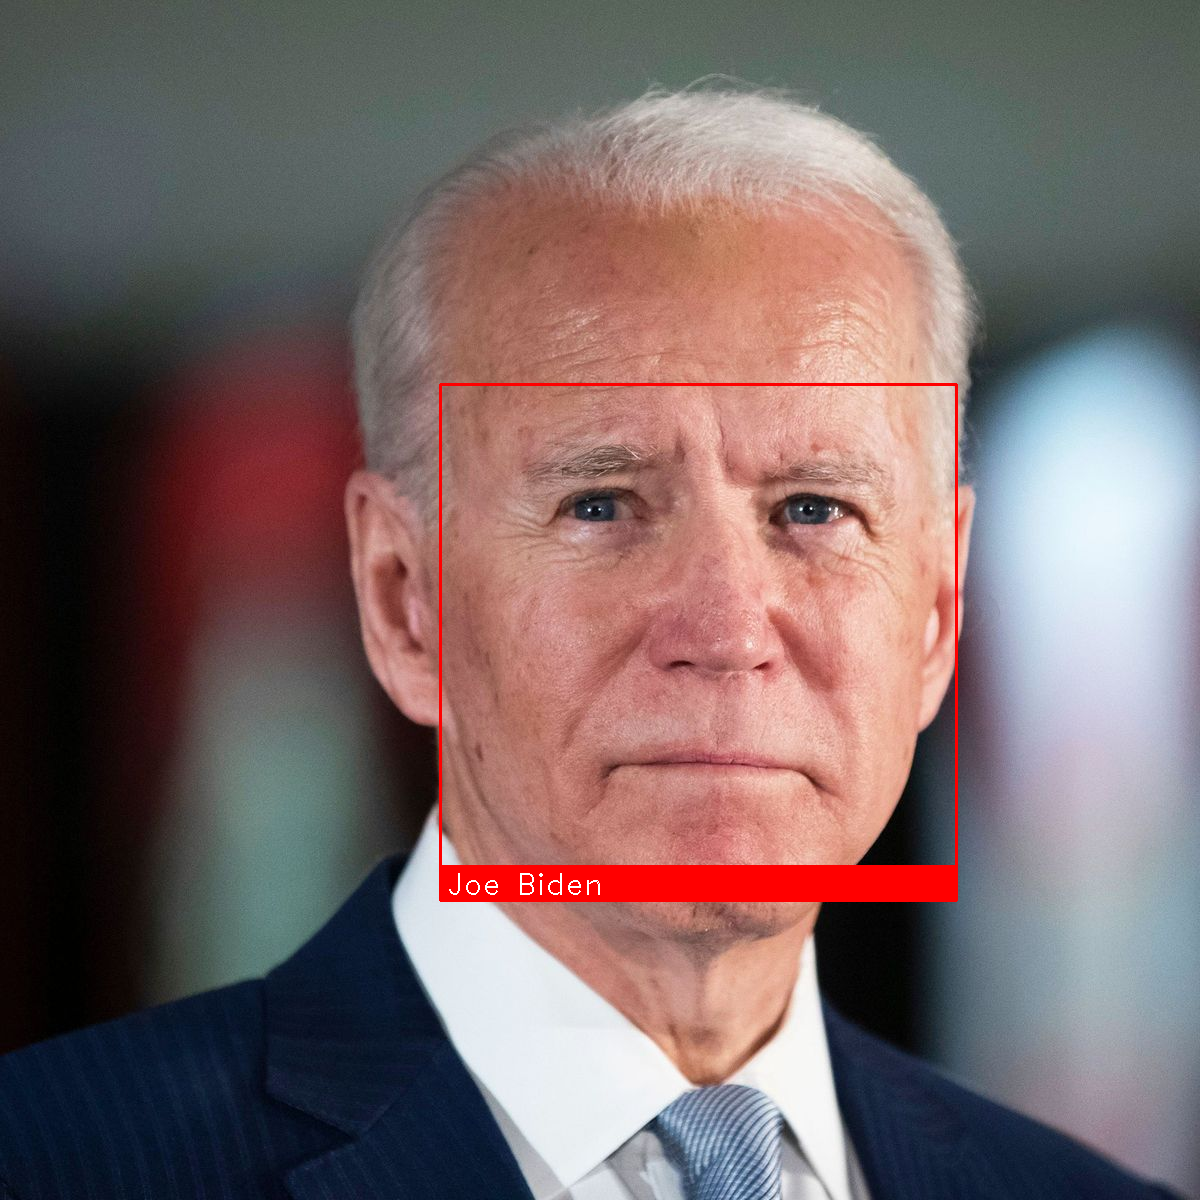

In [12]:
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load a sample picture and learn how to recognize it.
trump_image = face_recognition.load_image_file("trump.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    trump_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Donald Trump",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

# Grab a single frame of video
frame = cv2.imread('biden2.jpg')

# Resize frame of video to 1/4 size for faster face recognition processing
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

# Only process every other frame of video to save time
if process_this_frame:
    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

        face_names.append(name)

# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
cv2_imshow(frame)